In [1]:
#importing packages
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%pip install seaborn
import seaborn as sns

In [2]:
df=pd.read_csv("advertising.csv")

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [13]:
column_names = ['TV', 'Radio', 'Newspaper', 'Sales']

for column in column_names:
    column_data = df[column]
    print(f"Column: {column}")
    print(column_data)
    print()

Column: TV
0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

Column: Radio
0      37.8
1      39.3
2      45.9
3      41.3
4      10.8
       ... 
195     3.7
196     4.9
197     9.3
198    42.0
199     8.6
Name: Radio, Length: 200, dtype: float64

Column: Newspaper
0      69.2
1      45.1
2      69.3
3      58.5
4      58.4
       ... 
195    13.8
196     8.1
197     6.4
198    66.2
199     8.7
Name: Newspaper, Length: 200, dtype: float64

Column: Sales
0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.3 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
print("total null values : ",df.isnull().sum())

total null values :  TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


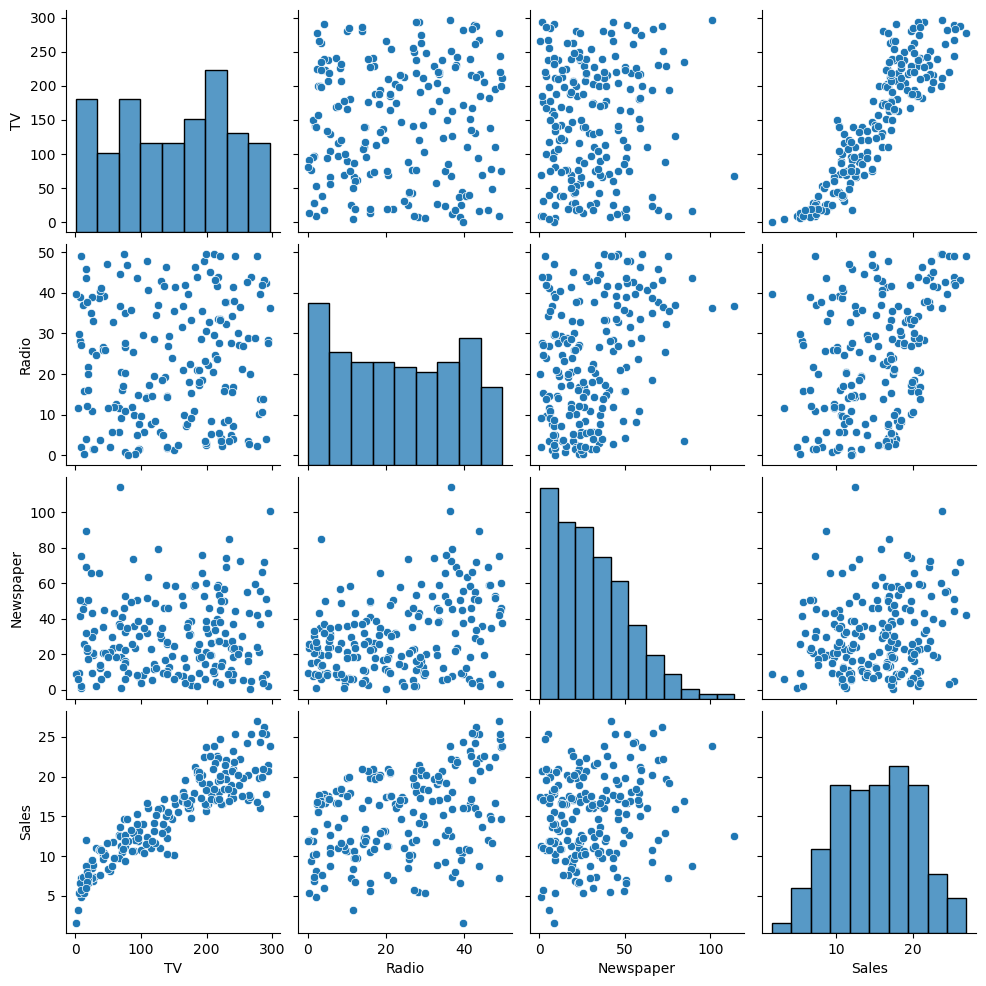

In [8]:
#rekational visual
sns.pairplot(df)
plt.show()

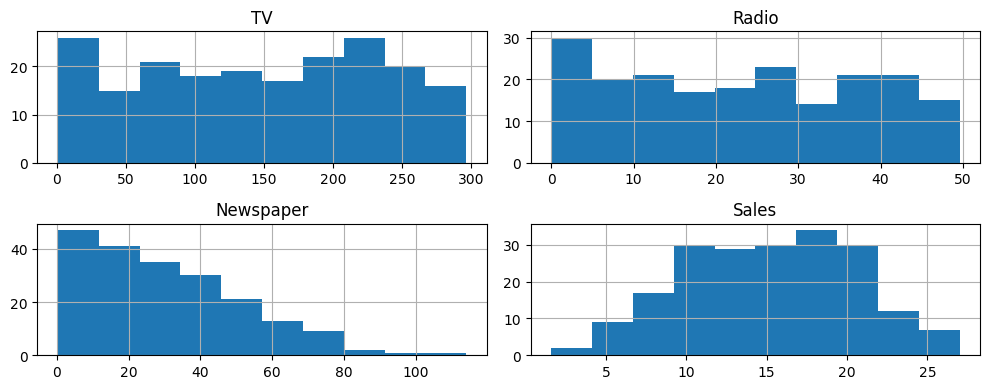

In [16]:
df.hist(bins=10,figsize=(10,4))
plt.tight_layout()
plt.show()

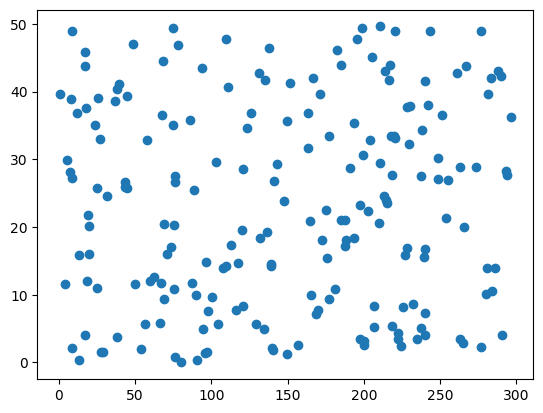

<class 'AttributeError'>: module 'matplotlib.pyplot' has no attribute 'xlable'

In [20]:

plt.scatter(df['TV'],df['Radio'])
plt.xlable('TV')
plt.ylable('Radio')
plt.title('TV VS Radio')
plt.show()

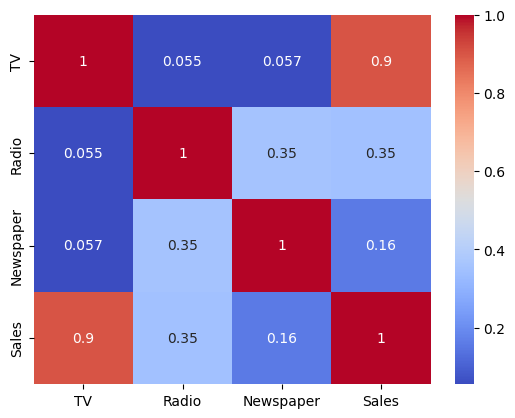

In [21]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

In [23]:
col = ['TV', 'Radio', 'Newspaper', 'Sales']
correlation_matrix = df[col].corr()
print(correlation_matrix)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


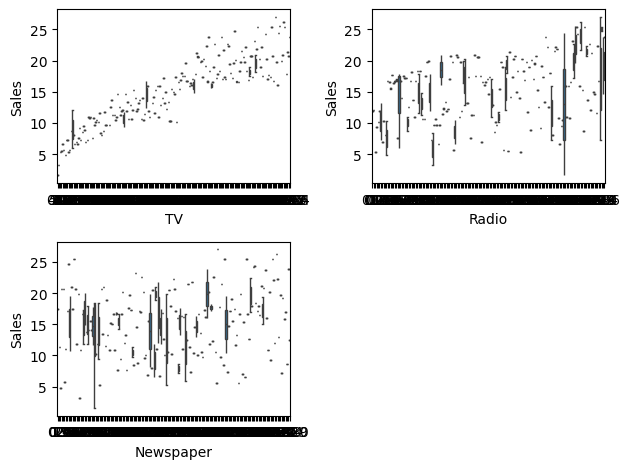

In [26]:
plt.subplot(2,2,1)
sns.boxplot(x='TV',y='Sales',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Radio',y='Sales',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='Newspaper',y='Sales', data=df)
plt.tight_layout()
plt.show()


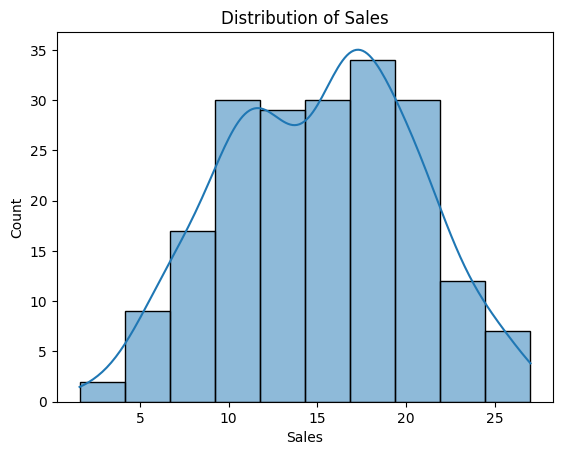

In [28]:

sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.show()

In [9]:
x=df[['TV', 'Radio', 'Newspaper']]
y=df['Sales']



In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
le=LinearRegression()
le.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred=le.predict(x_test)
print("Mean sruared error:",mean_squared_error(y_test,y_pred))
print("R-squared:",r2_score(y_test,y_pred))
print("Coefficient:",le.coef_)
print("intercept:",le.intercept_)

Mean sruared error: 2.907756910271091
R-squared: 0.9059011844150826
Coefficient: [0.05450927 0.10094536 0.00433665]
intercept: 4.714126402214136


In [32]:
#evaluation
exmp=[[100,20,30]]
pred_sales=le.predict(exmp)
print("predicted sales:",pred_sales)

/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


predicted sales: [12.31406014]
